In [1]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [4]:
subscription_key = "f9ab31f762d440a789fb4164132a7471"
assert subscription_key

In [6]:
vision_base_url = "https://centralindia.api.cognitive.microsoft.com/vision/v2.0/"

In [8]:
analyze_url = vision_base_url + "analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "test.jpeg"

{u'color': {u'dominantColorForeground': u'Brown', u'dominantColors': [u'Grey'], u'isBWImg': False, u'dominantColorBackground': u'Grey', u'accentColor': u'227E78', u'isBwImg': False}, u'metadata': {u'width': 275, u'format': u'Jpeg', u'height': 183}, u'description': {u'captions': [{u'text': u'a dog is posing for the camera', u'confidence': 0.9237648192142834}], u'tags': [u'dog', u'brown', u'sitting', u'small', u'posing', u'holding', u'standing', u'smiling', u'large', u'wearing', u'front', u'little', u'yellow', u'white', u'woman', u'table', u'blue', u'ball']}, u'categories': [{u'score': 0.9921875, u'name': u'animal_dog'}], u'requestId': u'c26ecac0-2529-41cf-9406-f6700fde16fe'}


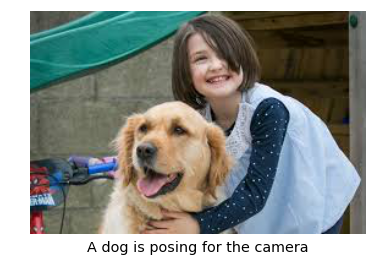

In [9]:
# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
              'Content-Type': 'application/octet-stream'}
params     = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)